In [1]:
# Plotting Metabolomics Results
#
# Author: Vanessa Brisson
# Copyright (C) 2023 Vanessa Brisson
#
# License: MIT

In [2]:
# LOAD NECESSARY PACKAGES

import numpy as np
import pandas as pd
import scipy.stats
from scipy import cluster
from scipy import spatial
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [3]:
# LOAD POSITIVE MODE DATA
# these are the positive mode data output from metatlas

In [4]:
data_POS_peakheight = pd.read_csv('ProcessedMetabolomicsData/POS_peak_height_curated.tab.txt',sep='\t',skiprows=(0),header=(1))
data_POS_peakheight.index = [' '.join(x.split('positive')[0].split('_')[1:]).strip() for x in data_POS_peakheight['file']]
data_POS_peakheight = data_POS_peakheight.drop(columns='file')
data_POS_peakheight = data_POS_peakheight.transpose()
data_POS_peakheight.insert(0,'sample name',['-'.join(x.split('_')[12:14]) for x in data_POS_peakheight.index])
data_POS_peakheight.insert(1,'sample type',[x.split('-')[0] for x in data_POS_peakheight['sample name']])
data_POS_peakheight.insert(2,'time point',[x.split('-')[1] for x in data_POS_peakheight['sample name']])
data_POS_peakheight.insert(3,'replicate',[x.split('-')[-1] for x in data_POS_peakheight['sample name']])
data_POS_peakheight.index = data_POS_peakheight['sample name']
data_POS_peakheight = data_POS_peakheight.fillna(0)
data_POS_peakheight = data_POS_peakheight.sort_index()
data_POS_peakheight = data_POS_peakheight.drop(columns=['2deoxyadenosine','pyridoxine'])

In [5]:
data_POS_peakarea = pd.read_csv('ProcessedMetabolomicsData/POS_peak_area_curated.tab.txt',sep='\t',skiprows=(0),header=(1))
data_POS_peakarea.index = [' '.join(x.split('positive')[0].split('_')[1:]).strip() for x in data_POS_peakarea['file']]
data_POS_peakarea = data_POS_peakarea.drop(columns='file')
data_POS_peakarea = data_POS_peakarea.transpose()
data_POS_peakarea.insert(0,'sample name',['-'.join(x.split('_')[12:14]) for x in data_POS_peakarea.index])
data_POS_peakarea.insert(1,'sample type',[x.split('-')[0] for x in data_POS_peakarea['sample name']])
data_POS_peakarea.insert(2,'time point',[x.split('-')[1] for x in data_POS_peakarea['sample name']])
data_POS_peakarea.insert(3,'replicate',[x.split('-')[-1] for x in data_POS_peakarea['sample name']])
data_POS_peakarea.index = data_POS_peakarea['sample name']
data_POS_peakarea = data_POS_peakarea.fillna(0)
data_POS_peakarea = data_POS_peakarea.sort_index()
data_POS_peakarea = data_POS_peakarea[['pyridoxine']]

In [6]:
# use peakheight for all of the positive mode peaks except for pyridoxine, 
# whose peak shape made peak area more reliable
data_POS = data_POS_peakheight.copy()
data_POS.insert(6,'pyridoxine', data_POS_peakarea['pyridoxine'])

In [7]:
# LOAD NEGATIVE MODE DATA
# these are the negative mode data output from metatlas

In [8]:
data_NEG_peakheight = pd.read_csv('ProcessedMetabolomicsData/NEG_peak_height_curated.tab.txt',sep='\t',skiprows=(0),header=(1))
data_NEG_peakheight.index = [' '.join(x.split('negative')[0].split('_')[1:]).strip() for x in data_NEG_peakheight['file']]
data_NEG_peakheight = data_NEG_peakheight.drop(columns='file')
data_NEG_peakheight = data_NEG_peakheight.transpose()
data_NEG_peakheight.insert(0,'sample name',['-'.join(x.split('_')[12:14]) for x in data_NEG_peakheight.index])
data_NEG_peakheight.insert(1,'sample type',[x.split('-')[0] for x in data_NEG_peakheight['sample name']])
data_NEG_peakheight.insert(2,'time point',[x.split('-')[1] for x in data_NEG_peakheight['sample name']])
data_NEG_peakheight.insert(3,'replicate',[x.split('-')[-1] for x in data_NEG_peakheight['sample name']])
data_NEG_peakheight.index = data_NEG_peakheight['sample name']
data_NEG_peakheight = data_NEG_peakheight.fillna(0)
data_NEG_peakheight = data_NEG_peakheight.sort_index()
data_NEG_peakheight = data_NEG_peakheight.drop(columns=['isonicotinic acid', 'N-acetyl-mannosamine', 'norleucine'])

In [9]:
data_NEG_peakarea = pd.read_csv('ProcessedMetabolomicsData/NEG_peak_area_curated.tab.txt',sep='\t',skiprows=(0),header=(1))
data_NEG_peakarea.index = [' '.join(x.split('negative')[0].split('_')[1:]).strip() for x in data_NEG_peakarea['file']]
data_NEG_peakarea = data_NEG_peakarea.drop(columns='file')
data_NEG_peakarea = data_NEG_peakarea.transpose()
data_NEG_peakarea.insert(0,'sample name',['-'.join(x.split('_')[12:14]) for x in data_NEG_peakarea.index])
data_NEG_peakarea.insert(1,'sample type',[x.split('-')[0] for x in data_NEG_peakarea['sample name']])
data_NEG_peakarea.insert(2,'time point',[x.split('-')[1] for x in data_NEG_peakarea['sample name']])
data_NEG_peakarea.insert(3,'replicate',[x.split('-')[-1] for x in data_NEG_peakarea['sample name']])
data_NEG_peakarea.index = data_NEG_peakarea['sample name']
data_NEG_peakarea = data_NEG_peakarea.fillna(0)
data_NEG_peakarea = data_NEG_peakarea.sort_index()

In [10]:
# using peakheight for all the negative peaks
data_NEG = data_NEG_peakheight.copy()

In [12]:
# merging positive and negative data
data = pd.merge(data_POS, data_NEG.drop(columns=['sample name','sample type','time point','replicate']), 
                left_index=True, right_index=True)
data = data.drop(columns='mandelic acid')
data.to_csv('ProcessedMetabolomicsData/MetabQuant.csv', index=False)

In [23]:
# this is the same data with metabolite names and sample identifiers manually rerormatted for plotting purposes
data2 = pd.read_csv('ProcessedMetabolomicsData/MetabQuant_with_labels.csv')
data2.index = data2['sample name']

In [24]:
# REMOVE BACKGROUND

# remove the background by subtracting the signal for the extraction control
data_bgd_sub = data2[['sample name', 'sample type', 'time point', 'replicate #']].copy()
for m in data2.columns[4:]:
    bgd = data2.loc[data2['sample type']=='extraction control'].mean()[m]
    bgd_sub = data2[m] - bgd
    bgd_sub[bgd_sub < 0] = 0
    data_bgd_sub[m] = bgd_sub
data_bgd_sub = data_bgd_sub.loc[data_bgd_sub['sample type']!='extraction control']

In [26]:
# NORMALIZE DATA

# normalize each metabolite to the maximum signal intensity for that metabolite 
data_norm = data_bgd_sub[['sample name', 'sample type', 'time point', 'replicate #']].copy()
for m in data_bgd_sub.columns[4:]:
    mymax = data_bgd_sub[m].max()
    data_norm[m] = data_bgd_sub[m]/data_bgd_sub[m].max()

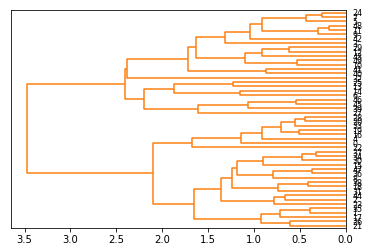

In [27]:
# PREPARE DATA FOR PLOTING HEATMAP

hmdata = data_norm[data_norm.columns[4:]].values.transpose()
metabolite_names = data_norm.columns[4:]

# do heirarchical clustering and plot the dendrogram
Y = spatial.distance.pdist(hmdata, metric='euclidean')
Z = cluster.hierarchy.linkage(Y, method='complete', metric='euclidean')
R = cluster.hierarchy.dendrogram(Z, color_threshold=np.inf, orientation='left')

# sort the data and associated metabolite names according to the clustering
sorted_hmdata = hmdata[R['leaves'][0]]
for idx in R['leaves'][1:len(R['leaves'])]:
    sorted_hmdata = np.vstack((sorted_hmdata, hmdata[idx]))
sorted_metabolite_names = [metabolite_names[x] for x in R['leaves']]

In [28]:
# PREPARE DATA FOR PLOTTING ACCUMULATION BUBBLE PLOT

#  determine mean signal intensity in exudate for each metabolite in each time point
data_norm_ex = data_norm.loc[(data_norm['sample type'] == 'exudate') & (data_norm['time point'] != 'medium control')]
ex_means = data_norm_ex.drop(columns='replicate #').groupby('time point').mean().transpose()
ex_means = ex_means.reindex(sorted_metabolite_names) # order based on heirarchical clustering match to heatmap

# determine average metabolite accumulation between time points
ex_means['d0to3'] = ex_means['3d']-ex_means['0d']
ex_means['d3to6'] = ex_means['6d']-ex_means['3d']
ex_means['d6to9'] = ex_means['9d']-ex_means['6d']
ex_means['d9to12'] = ex_means['12d']-ex_means['9d']

ex_diff = ex_means[['d0to3','d3to6','d6to9','d9to12']]

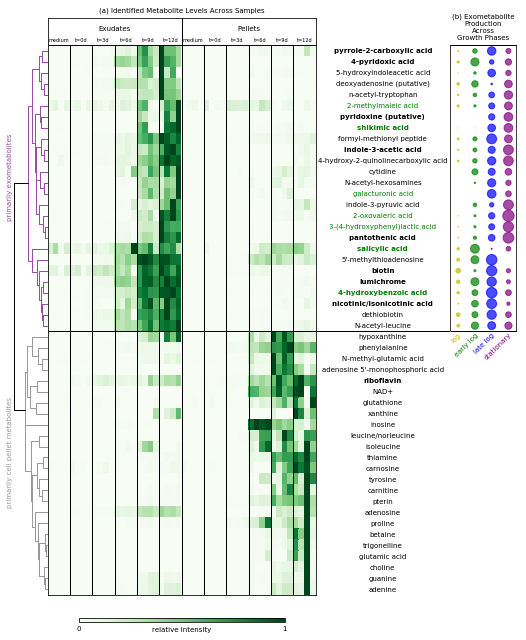

In [36]:
# CREATE PLOT

# set up the figure
fig=plt.figure(figsize=(7.28,9))
gs=GridSpec(3,4, width_ratios=(0.5,4,2,1), height_ratios=(1,20,1)) # create the grid that the plot goes on
ax1=fig.add_subplot(gs[1,0]) # axis 1 contains the dendrogram
ax2=fig.add_subplot(gs[1,1]) # axis 2 contains the heatmap
ax2a=fig.add_subplot(gs[0,1]) # axis 2a contains the sample group labels
ax2b=fig.add_subplot(gs[2,1]) # axis 2b contains the heatmap colorbar
ax3=fig.add_subplot(gs[1,2]) # axis 3 contains the metabolite labels
ax4=fig.add_subplot(gs[1,3]) # axis 4 contains the circle plot

# plot the dendrogram
plt.sca(ax1)   
for i in range(len(R['dcoord'])):
    if i < 25: color='#984ea3'
    elif i == len(R['dcoord'])-1: color='k'
    else: color='#999999'
    plt.plot(-1*np.array(R['dcoord'][i]), R['icoord'][i], color=color, lw=1)  
plt.ylim([10*hmdata.shape[0],0])
plt.text(-3.6,120,'primarily exometabolites',fontsize=7, rotation=90, ha='right', va='center', color='#984ea3')
plt.text(-3.6,370,'primarily cell pellet metabolites',fontsize=7, rotation=90, ha='right', va='center', color='#999999')
plt.xlim(-3.5,0)
plt.yticks([])
ax1.axis('off')

# plot the heatmap
plt.sca(ax2)
plt.pcolormesh(sorted_hmdata, cmap='Greens')
x = np.arange(12) * 4 
plt.vlines(x[1:len(x)],-1,data.shape[1],color='k', lw=1)
plt.hlines(26,0,48, lw=1)
plt.ylim(hmdata.shape[0],0)
plt.xticks([])
plt.yticks([])

# add the sample group labels
plt.sca(ax2a)
plt.title('(a) Identified Metabolite Levels Across Samples', fontsize=7)
plt.text(12,2,'Exudates', fontsize=7, rotation=0, ha='center', va='center')
plt.text(36,2,'Pellets', fontsize=7, rotation=0, ha='center', va='center')
times = ['medium','t=0d','t=3d','t=6d','t=9d','t=12d',
         'medium','t=0d','t=3d','t=6d','t=9d','t=12d']
for idx in range(len(times)):
    if times[idx] != 'medium':
        plt.text(x[idx]+2,1,times[idx], va='center', ha='center', fontsize=5)
    else:
        plt.text(x[idx]+2,1,times[idx], va='center', ha='center', fontsize=5)
plt.vlines(24,0,3,color='k', lw=1)
plt.xlim(0,48)
plt.ylim(0.5,3)
plt.xticks([])
plt.yticks([])

# add the colorbar
plt.sca(ax2b)
cbar = plt.colorbar(drawedges=False, ticks=[0,1],aspect=50, orientation='horizontal')
cbar.ax.set_xticklabels([0,1], fontsize=7)
cbar.set_label(label='relative intensity',fontsize=7, labelpad=-5)
cbar.ax.tick_params(length=0)
plt.axis('off')

# add the metabolite labels
plt.sca(ax3)
favorites = ['riboflavin', '4-hydroxybenzoic acid', 'lumichrome', 'nicotinic/isonicotinic acid', 'biotin', 'salicylic acid', 
             'mandelic acid', '4-pyridoxic acid', 'pyrrole-2-carboxylic acid', 'indole-3-acetic acid', '2-hydroxyphenylacetic acid',
             'pantothenic acid', 'shikimic acid', 'pyridoxine (putative)']
nitrogen = ["deoxyadenosine (putative)","4-hydroxy-2-quinolinecarboxylic acid","4-pyridoxic acid","5-hydroxyindoleacetic acid",
            "5'-methylthioadenosine","adenine","adenosine","adenosine 5'-monophosphoric acid","betaine","biotin","carnitine","carnosine",
            "choline","cytidine","guanine","dethiobiotin","formyl-methionyl peptide","glutamic acid","glutathione","guanine",
            "hypoxanthine","indole-3-acetaldehyde","indole-3-acetic acid","indole-3-pyruvic acid","inosine","isoleucine",
            "leucine/norleucine","lumichrome","N-acetyl-hexosamines","N-acetyl-leucine","n-acetyl-tryptophan","NAD+","nicotinamide",
            "nicotinic/isonicotinic acid","N-methyl-glutamic acid","pantothenic acid","phenylalanine","proline","pterin",
            "pyridoxine (putative)",
            "pyrrole-2-carboxylic acid","riboflavin","thiamine","thymine","trigonelline","tyrosine","uracil","xanthine"]
for idx in np.arange(len(ex_diff.index)):
    weight = 'normal'
    color = 'k'
    if ex_diff.index[idx] in favorites:
        weight = 'extra bold'
    if not(ex_diff.index[idx] in nitrogen):
        color = 'g'
    plt.text(0,idx,ex_diff.index[idx], fontsize=7, ha='center', va='center', weight=weight, color=color)
plt.hlines(25.5,-1,1, lw=1)
plt.ylim(len(ex_diff.index)-0.5, -0.5)
plt.xlim(-1,1)
plt.axis('off')

#plot the bubble plot
plt.sca(ax4)
colors = ['y','g','b','purple']
for y in range(len(ex_diff.index)):
    plt.scatter([0,1,2,3],y*np.ones(4),
                s=ex_diff.loc[ex_diff.index[y]]*200, 
                c=colors,
                alpha=0.7)
rect = patches.Rectangle((-0.5,25.5), 4, 30, linewidth=1, edgecolor='w', facecolor='w')
ax4.add_patch(rect)
plt.hlines([-0.5,25.5],-0.5,4.5, lw=1)
plt.vlines([-0.5,3.5], -0.5,25.5)
plt.ylim(len(ex_diff.index)-0.5, -0.5)
plt.xlim(-0.5,3.5)
plt.axis('off')
phases = ['lag','early log','late log','stationary']
for i in range(len(phases)):
    plt.text(i+0.25,26,phases[i], fontsize=7, rotation=45, ha='right', color=colors[i])
plt.title('(b) Exometabolite\nProduction\nAcross\nGrowth Phases',fontsize=7)
ax4.tick_params(length=0)

# cleanup
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0, right=0.99)
plt.savefig('Figure3.png', dpi=200)
plt.show()

In [ ]:
# chi square test analyses of associatins of metablite groups with exudates or cell pellets

In [32]:
#organic acids 
scipy.stats.chisquare([0,10], f_exp=[24/50*10,26/50*10])

Power_divergenceResult(statistic=9.23076923076923, pvalue=0.002379816463809706)

In [33]:
#nucleoside
scipy.stats.chisquare([6,3], f_exp=[24/50*9,26/50*9])

Power_divergenceResult(statistic=1.256410256410256, pvalue=0.2623316754083541)

In [34]:
#amino acids
scipy.stats.chisquare([5,3], f_exp=[24/50*8,26/50*8])

Power_divergenceResult(statistic=0.6738782051282053, pvalue=0.4117027470058471)

In [35]:
#vitamins
scipy.stats.chisquare([2,7], f_exp=[24/50*9,26/50*9])

Power_divergenceResult(statistic=2.3960113960113967, pvalue=0.12164505343634172)